<a href="https://colab.research.google.com/github/Kaleab1999/Ethiopia-airlines-tweeter-review-sentiment-analysis/blob/main/Xlnet_for_thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### importing Bert tokenizer and model

In [2]:
import pandas as pd
from transformers import XLNetTokenizer, XLNetForSequenceClassification
from transformers import Trainer, TrainingArguments

### loading dataset

In [3]:
df= pd.read_csv('/content/sentiment twitter dataset.csv', encoding = 'unicode_escape')
df.head()

,created_at,user_id,name,label,tweet,language,link,Column1
0,2022-10-28 23:15:24 UTC,4.386524e+08,AfricanSon®,negative,Ethiopian Airlines (EA) flight ET-3717 was int...,en,https://twitter.com/samsenge/status/1586134568...,NaN
1,2022-10-28 22:53:28 UTC,1.320000e+18,Bargo YOUSIF,negative,"_ details: It's #Ethiopian_Airlines flight, sm...",en,https://twitter.com/BargoYousif/status/1586129...,NaN
2,2022-10-28 22:21:31 UTC,8.226798e+08,Dr. Aklog Birara,positive,I look forward to seeing integrated infrastruc...,en,https://twitter.com/DrAklogBirara/status/15861...,NaN
3,2022-10-28 19:46:19 UTC,1.470000e+18,bill,negative,@jaeyoonieee me getting on ethiopian airlines ...,en,https://twitter.com/ysfkd_/status/158608195096...,NaN
4,2022-10-28 16:40:48 UTC,1.570000e+18,OverMeon,neutral,#ETH552 ET-AVE A350 941 Ethiopian Airlines ADD...,en,https://twitter.com/OverMeon/status/1586035262...,NaN


In [4]:
df['label'].value_counts()

neutral     2274
positive    1119
negative    1036
Name: label, dtype: int64

In [5]:
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

### visualizing the distribution of label

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


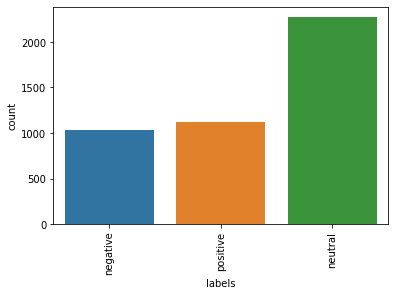

In [6]:
sns.countplot('label', data = df)
plt.xlabel('labels')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

In [7]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [10]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### loading pretrained model

In [12]:
tokenizer = XLNetTokenizer.from_pretrained('ynie/xlnet-large-cased-snli_mnli_fever_anli_R1_R2_R3-nli')
model = XLNetForSequenceClassification.from_pretrained('ynie/xlnet-large-cased-snli_mnli_fever_anli_R1_R2_R3-nli', num_labels=3)

In [13]:
!pip install text_hammer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 KB 9.1 MB/s eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [14]:
import spacy
import re
import text_hammer as th
nlp=  spacy.load('en_core_web_sm')

### funcion to preprocess the text

In [15]:
def text_preprocessor(x):

  doc = nlp(x)
  
  text= [word.lemma_.lower().strip() for word in doc ]
  text = str(x).lower().replace('\\', '').replace('_', ' ')
  text = th.cont_exp(text)
  text = th.remove_emails(text)
  text = th.remove_urls(text)
  text = th.remove_html_tags(text)
  text = th.remove_rt(text)
  text = th.remove_accented_chars(text)
  text = th.remove_special_chars(text)
  text = re.sub("(.)\\1{2,}", "\\1", text)
  text= re.sub('[^a-zA-Z]', ' ',text)

  text= text.strip()

  return text

In [16]:
df['processed']= df['tweet'].apply(text_preprocessor)

In [17]:
df.head()

,created_at,user_id,name,label,tweet,language,link,Column1,processed
0,2022-10-28 23:15:24 UTC,4.386524e+08,AfricanSon®,negative,Ethiopian Airlines (EA) flight ET-3717 was int...,en,https://twitter.com/samsenge/status/1586134568...,NaN,ethiopian airlines ea flight et was interc...
1,2022-10-28 22:53:28 UTC,1.320000e+18,Bargo YOUSIF,negative,"_ details: It's #Ethiopian_Airlines flight, sm...",en,https://twitter.com/BargoYousif/status/1586129...,NaN,details it is ethiopian airlines flight smoke ...
2,2022-10-28 22:21:31 UTC,8.226798e+08,Dr. Aklog Birara,positive,I look forward to seeing integrated infrastruc...,en,https://twitter.com/DrAklogBirara/status/15861...,NaN,i look forward to seeing integrated infrastruc...
3,2022-10-28 19:46:19 UTC,1.470000e+18,bill,negative,@jaeyoonieee me getting on ethiopian airlines ...,en,https://twitter.com/ysfkd_/status/158608195096...,NaN,jaeyoonie me getting on ethiopian airlines and...
4,2022-10-28 16:40:48 UTC,1.570000e+18,OverMeon,neutral,#ETH552 ET-AVE A350 941 Ethiopian Airlines ADD...,en,https://twitter.com/OverMeon/status/1586035262...,NaN,eth etavenuea ethiopian airlines adu...


In [18]:
df['label']= df['label'].astype('category').cat.codes

In [19]:
# chaning the dataset to list, since tokenizer doesn't accept pandas.series data

X= list(df['processed'])
y= list(df['label'])

In [20]:
# train and test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify= y, test_size=0.2)

In [21]:
## tokenize, padding = True means if the sentence has small number of words than the max_length to put 0 at the end.
# truncation = True means if the sentence has large number of words than the max_length to remove the rest

train_data= tokenizer (X_train, padding=True , truncation=True, max_length=512)

test_data= tokenizer(X_test, padding=True, truncation=True, max_length=512)

In [22]:
type(train_data)

transformers.tokenization_utils_base.BatchEncoding

In [23]:
train_data.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [24]:
### changing to torch dataset

import torch

In [25]:
# Create torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

In [26]:
train_dataset = Dataset(train_data, y_train)
test_dataset = Dataset(test_data, y_test)

In [27]:
train_dataset[6]

{'input_ids': tensor([    5,     5,     5,     5,     5,     5,     5,     5,     5,     5,
             5,     5,     5,     5,     5,     5,     5,     5,     5,     5,
             5,     5,     5,     5,     5,     5,     5,     5,     5,     5,
             5,     5,     5,     5,     5,     5,     5,     5,     5,     5,
             5,     5,     5,     5,     5,     5,     5,     5,     5,     5,
             5,     5,     5,     5,     5,     5,     5,     5,     5,     5,
             5,     5,     5,     5,     5,     5,     5,     5,     5,     5,
             5,     5,     5,     5,     5,     5,     5,     5,     5,     5,
             5,     5,     5,     5,     5,     5,     5,     5,     5,     5,
             5,     5,     5,     5,     5,     5,     5,     5,     5,     5,
             5,     5,     5,     5,     5,     5,     5,     5,     5,     5,
            17,  6660,  1888, 24278,  7964,  2115,    17,  6660,  9219,  1071,
           308,  5236,  9854,    38,  1

In [28]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import numpy as np

In [29]:
def compute_metrics(p):
    print(type(p))
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    #accuracy = accuracy_score(y_true=labels, y_pred=pred, average='micro')
    # average= 'micro' because it's multi-class classification u can use also macro, or weight or other 
    # u shouldn't mention anything for binary classification
    recall = recall_score(y_true=labels, y_pred=pred, average='micro')
    precision = precision_score(y_true=labels, y_pred=pred, average='micro')
    f1 = f1_score(y_true=labels, y_pred=pred, average='micro')

    return { "precision": precision, "recall": recall, 'f1-score': f1}

In [30]:
# Define Trainer
args = TrainingArguments(
    output_dir="resul",
    num_train_epochs=10,
    per_device_train_batch_size=8

)
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

In [31]:
trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 3543
  Num Epochs = 10
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 4430
  Number of trainable parameters = 361321475


Step,Training Loss
500,1.072300
1000,1.063100
1500,1.048600
2000,1.054400
2500,1.046400
3000,1.038300
3500,1.041300
4000,1.034300


Saving model checkpoint to resul/checkpoint-500
Configuration saved in resul/checkpoint-500/config.json
Model weights saved in resul/checkpoint-500/pytorch_model.bin
Saving model checkpoint to resul/checkpoint-1000
Configuration saved in resul/checkpoint-1000/config.json
Model weights saved in resul/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to resul/checkpoint-1500
Configuration saved in resul/checkpoint-1500/config.json
Model weights saved in resul/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to resul/checkpoint-2000
Configuration saved in resul/checkpoint-2000/config.json
Model weights saved in resul/checkpoint-2000/pytorch_model.bin
Saving model checkpoint to resul/checkpoint-2500
Configuration saved in resul/checkpoint-2500/config.json
Model weights saved in resul/checkpoint-2500/pytorch_model.bin
Saving model checkpoint to resul/checkpoint-3000
Configuration saved in resul/checkpoint-3000/config.json
Model weights saved in resul/checkpoint-3000/pytorch

TrainOutput(global_step=4430, training_loss=1.0479604062323646, metrics={'train_runtime': 3758.9624, 'train_samples_per_second': 9.425, 'train_steps_per_second': 1.179, 'total_flos': 8870175009868500.0, 'train_loss': 1.0479604062323646, 'epoch': 10.0})

In [32]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 886
  Batch size = 8


<class 'transformers.trainer_utils.EvalPrediction'>


{'eval_loss': 1.0496931076049805,
 'eval_precision': 0.5135440180586908,
 'eval_recall': 0.5135440180586908,
 'eval_f1-score': 0.5135440180586908,
 'eval_runtime': 26.9116,
 'eval_samples_per_second': 32.923,
 'eval_steps_per_second': 4.125,
 'epoch': 10.0}

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
text = """ETH552 ET-AVE A350 941 Ethiopian Airlines ADD-DUB Bole International 
Airport to Dublin Airport: 14.9 mi away @ 40000 ft and 27.0° frm hrzn, 
heading NW @ 650.6mi/h 03:42:31. #AfterHours #WayTheHeckUpThere
 #FlyingFast #OverMeon #MeonVale #CV37 #ADSB #dump1090 """
text1= df['tweet'][8]
# text = "go to hell"
text= text_preprocessor(text)
print(text)
inputs = tokenizer(text,padding = True, truncation = True, return_tensors='pt').to('cuda')
outputs = model(**inputs)
print(outputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)
predictions = predictions.cpu().detach().numpy()
print(predictions)

### saving model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
trainer.save_model('/content/drive/MyDrive/Ethiopian_Airlines_model')

In [ ]:
model_2 = BertForSequenceClassification.from_pretrained("/content/drive/MyDrive/Ethiopian_Airlines_model")
model_2.to('cuda')

In [ ]:
# text = "That was good point"
text = "Ethiopian airlines sanctioned"
text= 'thiopian Airlines flight intercepted after radio silence  Pilots fell asleep'
#text= text_preprocessor(text)
inputs = tokenizer(text,padding = True, truncation = True, return_tensors='pt').to('cuda')
outputs = model_2(**inputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
predictions = predictions.cpu().detach().numpy()
predictions

### load the deployed model and predict

In [ ]:
tokenizer= BertTokenizer.from_pretrained('bert-base-uncased')
model_2 = BertForSequenceClassification.from_pretrained("Kaleab1999/ethiopian-airlines")
model_2.to('cuda')

In [ ]:
import torch

In [ ]:
text = "Ethiopian ailines was good point"
#text = "Ethiopian airlines sanctioned"
#text= 'thiopian Airlines flight intercepted after radio silence  Pilots fell asleep'
#text= text_preprocessor(text)
inputs = tokenizer(text,padding = True, truncation = True, return_tensors='pt').to('cuda')
outputs = model_2(**inputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
predictions = predictions.cpu().detach().numpy()
if predictions[0][0] == max(predictions[0]):
                           print('negative')
if predictions[0][1] == max(predictions[0]):
                           print('neutral')
if predictions[0][2] ==max(predictions[0]):
                           print('positive')                        

### Pushing the model to hugging face hub 

In [ ]:
!pip install huggingface_hub

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
model_2.push_to_hub("Kaleab1999/ethiopian-airlines")